# Getting merger event details and some info from catalog

In [5]:
import pycbc.catalog as catalog

c = catalog.Catalog(source='gwtc-2')

# Names of mergers in the catalog
print(c.names,'\n\n')


print('GPS time \n\n',[c[m].time for m in c])  # gives when the merger occured

dict_keys(['GW190930_133541-v1', 'GW190929_012149-v1', 'GW190924_021846-v1', 'GW190915_235702-v1', 'GW190910_112807-v1', 'GW190909_114149-v1', 'GW190828_065509-v1', 'GW190828_063405-v1', 'GW190814-v2', 'GW190803_022701-v1', 'GW190731_140936-v1', 'GW190728_064510-v1', 'GW190727_060333-v1', 'GW190720_000836-v1', 'GW190719_215514-v1', 'GW190708_232457-v1', 'GW190707_093326-v1', 'GW190706_222641-v1', 'GW190701_203306-v1', 'GW190630_185205-v1', 'GW190620_030421-v1', 'GW190602_175927-v1', 'GW190527_092055-v1', 'GW190521_074359-v1', 'GW190521-v3', 'GW190519_153544-v1', 'GW190517_055101-v1', 'GW190514_065416-v1', 'GW190513_205428-v1', 'GW190512_180714-v1', 'GW190503_185404-v1', 'GW190426_152155-v1', 'GW190425-v2', 'GW190424_180648-v1', 'GW190421_213856-v1', 'GW190413_134308-v1', 'GW190413_052954-v1', 'GW190412-v3', 'GW190408_181802-v1']) 


GPS time 

 [1253885759.2, 1253755327.5, 1253326744.8, 1252627040.7, 1252150105.3, 1252064527.7, 1251010527.9, 1251009263.8, 1249852257.0, 1248834439.9, 12

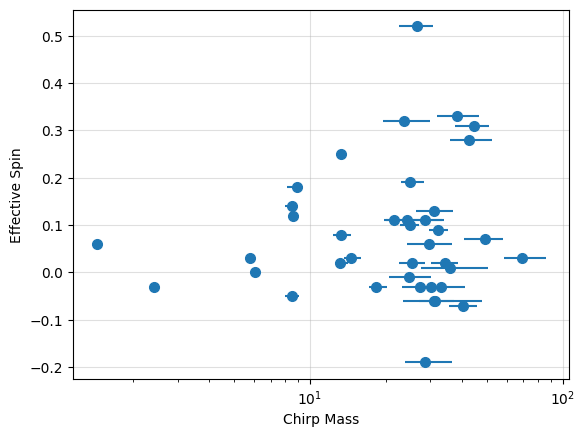

In [8]:
import matplotlib.pyplot as plt
import pycbc.catalog


c = pycbc.catalog.Catalog(source='gwtc-2')
mchirp, elow, ehigh = c.median1d('mchirp', return_errors=True)
spin = c.median1d('chi_eff')

plt.errorbar(mchirp, spin, xerr=[-elow, ehigh], fmt='o', markersize=7)
plt.xlabel('Chirp Mass')
plt.xscale('log')
plt.ylabel('Effective Spin')
plt.grid(alpha = 0.4)
plt.show()

# Getting data on whether the detector is in active state

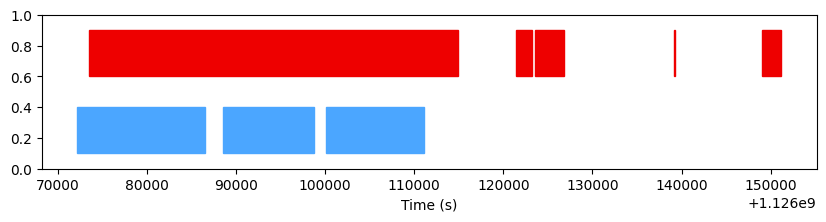

In [10]:
import matplotlib.pyplot as plt
from pycbc import dq
from pycbc.results import ifo_color    # for interferometry colour


start_time = 1126051217
end_time = start_time + 100000          # Gps time .... can be varied also 


hsegs = dq.query_flag('H1', 'DATA', start_time, end_time)   # for hanford


lsegs = dq.query_flag('L1', 'DATA', start_time, end_time)   # for livingston

plt.figure(figsize=[10,2])
for seg in lsegs:
    start, end = seg
    plt.axvspan(start, end, color=ifo_color('L1'), ymin=0.1, ymax=0.4)

for seg in hsegs:
    start, end = seg
    plt.axvspan(start, end, color=ifo_color('H1'), ymin=0.6, ymax=0.9)

plt.xlabel('Time (s)')
plt.show()

# FFT from pycbc

### Function based api (can be slow)

In [17]:
import numpy as np
from pycbc import types
from pycbc import fft

inarr = types.Array(np.ones([64], dtype=np.complex64))

outarr = types.Array(np.zeros([64], dtype=np.complex64))

fft.fft(inarr, outarr)

print('If the data is complex valued \n',outarr)




# if the time series is real data


inarr = types.Array(np.ones([64], dtype=np.float32))

outarr = types.Array(np.zeros([33], dtype=np.complex64))   # so we need only half of them for frequency domain

fft.fft(inarr, outarr)

print('IF the time series data is real \n',outarr)


If the data is complex valued 
 [64.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j]
IF the time series data is real 
 [64.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]


In [19]:
inarr = types.Array(np.ones([33], dtype=np.complex64))   # for inverse fft

outarr = types.Array(np.zeros([64], dtype=np.float32))

fft.ifft(inarr, outarr)

print(outarr)

[64.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [2]:
# if it is time series and frequency series data with consistent length of the arary

import numpy as np
from pycbc import types

inarr = types.TimeSeries(np.ones([64], dtype=np.float64), delta_t=1./64.)

outarr = inarr.to_frequencyseries()       # automatically does fft
print(outarr)   # automatically normalizes

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j]


In [22]:
inarr = types.FrequencySeries(np.ones([33], dtype=np.complex128), delta_f=1.)

outarr = inarr.to_timeseries()
print(outarr)

[64.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# Class Based API  (optimized)

In [ ]:
from pycbc import fft

fft_class = pycbc.fft.FFT(inarr, outarr)
fft_class.execute()

outarr *= inarr._delta_t # if inarr is a TimeSeries   # for proper normalization 

outarr *= inarr._delta_f # if inarr is a FrequencySeries

In [ ]:
ifft_class = pycbc.fft.IFFT(inarr, outarr)
ifft_class.execute()

outarr *= inarr._delta_t # ONLY IF inarr is a TimeSeries   # for proper normalization 

outarr *= inarr._delta_f # ONLY IF inarr is a FrequencySeries


In [25]:
fft_class = pycbc.fft.FFT(inarr, outarr)

inarr = types.TimeSeries(np.ones([64], dtype=np.float64), delta_t=1./64.)

fft_class.execute()
outarr *= inarr._delta_t

print(outarr)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j]


# Taking a GW event and getting data from it 

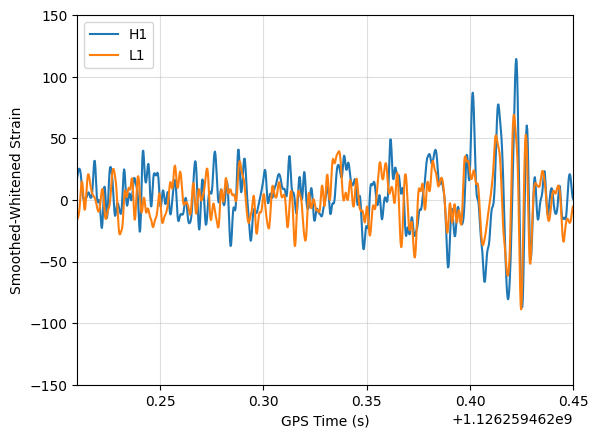

In [3]:
import matplotlib.pyplot as plt
from pycbc.filter import highpass_fir, lowpass_fir
from pycbc.psd import welch, interpolate
from pycbc.catalog import Merger


for ifo in ['H1', 'L1']:
    
    h1 = Merger("GW150914").strain(ifo)  # assigning an event
    h1 = highpass_fir(h1, 15, 8)    # only allow above 15Hz but with transition 

    
    psd = interpolate(welch(h1), 1.0 / h1.duration)    # making it compatible with the signal length

    # whiten to remove noise further
    white_strain = (h1.to_frequencyseries() / psd ** 0.5).to_timeseries()    # giving weigtage to the data based on detector noise 
                                                                            # and reverting back to time domain
    # removing  some of the high and low freq with some transistions
    smooth = highpass_fir(white_strain, 35, 8)
    smooth = lowpass_fir(smooth, 300, 8)

    # time shift 
    if ifo == 'L1':
        smooth *= -1   # because of antenna pattern
        smooth.roll(int(.007 / smooth.delta_t))

    plt.plot(smooth.sample_times, smooth, label=ifo)

plt.legend()
plt.xlim(1126259462.21, 1126259462.45)
plt.ylim(-150, 150)
plt.ylabel('Smoothed-Whitened Strain')
plt.grid(alpha = 0.4)
plt.xlabel('GPS Time (s)')
plt.show()

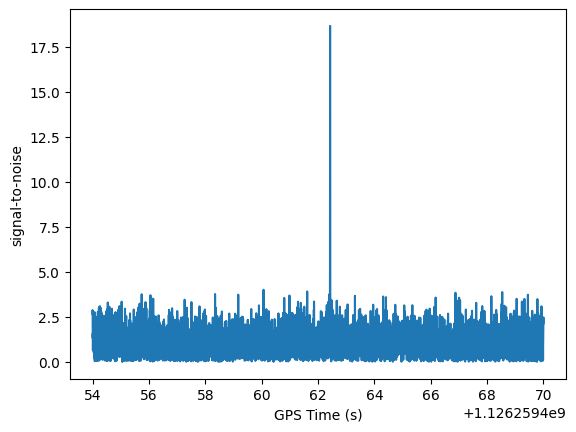

In [55]:
import matplotlib.pyplot as pp
from urllib.request import urlretrieve
from pycbc.frame import read_frame
from pycbc.filter import highpass_fir, matched_filter
from pycbc.waveform import get_fd_waveform
from pycbc.psd import welch, interpolate


# Read data  if we know a url and remove low frequency content
fname = 'H-H1_LOSC_4_V2-1126259446-32.gwf'
url = "https://www.gwosc.org/GW150914data/" + fname
urlretrieve(url, filename=fname)
h1 = read_frame('H-H1_LOSC_4_V2-1126259446-32.gwf', 'H1:LOSC-STRAIN')
h1 = highpass_fir(h1, 15, 8)

# Calculate the noise spectrum
psd = interpolate(welch(h1), 1.0 / h1.duration)

# Generate a template to filter with
hp, hc = get_fd_waveform(approximant="IMRPhenomD", mass1=40, mass2=32,
                         f_lower=20, delta_f=1.0/h1.duration)
hp.resize(len(h1) // 2 + 1)


snr = matched_filter(hp, h1, psd=psd, low_frequency_cutoff=20.0)

# Remove regions corrupted due to edges
snr = snr[len(snr) // 4: len(snr) * 3 // 4]   # just slicing or zooming to remove edge effects

plt.plot(snr.sample_times, abs(snr))
plt.ylabel('signal-to-noise')
plt.xlabel('GPS Time (s)')
plt.show()


# this is the time the where the template matched with the actual signal very strongly

## Generating a sound track from the strain 

In [16]:
from pycbc.frame import read_frame
from urllib.request import urlretrieve
from pycbc.types import TimeSeries
from pycbc.filter import highpass_fir , lowpass_fir
from pycbc.psd import welch,  interpolate

# Read data and remove low frequency content
fname = 'H-H1_LOSC_4_V2-1126259446-32.gwf'
url = "https://www.gwosc.org/GW150914data/" + fname
urlretrieve(url, filename=fname)
h1 = highpass_fir(read_frame(fname, 'H1:LOSC-STRAIN'), 15.0, 8)

# Calculate the noise spectrum and whiten
psd = interpolate(welch(h1), 1.0 / 32)
white_strain = (h1.to_frequencyseries() / psd ** 0.5 * psd.delta_f).to_timeseries()

# remove some of the high and low frequencies
smooth = highpass_fir(white_strain, 25, 8)
smooth = lowpass_fir(white_strain, 250, 8)

#strech out and shift the frequency upwards to aid human hearing
fdata = smooth.to_frequencyseries()
fdata.roll(int(1200 / fdata.delta_f))
smooth = TimeSeries(fdata.to_timeseries(), delta_t=1.0/1024)

#Take slice around signal
smooth = smooth[len(smooth)//2 - 1500:len(smooth)//2 + 3000]
smooth.save_to_wav('gw150914_h1_chirp.wav')

print(h1.duration)

32.0


## Getting detectors info 

In [9]:
from pycbc.detector import Detector, get_available_detectors


for abv in get_available_detectors():
    d = Detector(abv)


    print(f"{abv}--> Latitude: {d.latitude} Longitude: {d.longitude}")  # gives in radians
                                                  

T1--> Latitude: 0.6226733602199997 Longitude: 2.43536359469
V0--> Latitude: 0.7615118398400004 Longitude: 0.18333805213
V1--> Latitude: 0.7615118398400004 Longitude: 0.18333805213
G1--> Latitude: 0.9118498275199999 Longitude: 0.17116780435
H2--> Latitude: 0.8107952638300001 Longitude: -2.084056769170001
H1--> Latitude: 0.8107952638300001 Longitude: -2.084056769170001
L1--> Latitude: 0.5334231350600002 Longitude: -1.58430937078
I1--> Latitude: 0.3423167673900001 Longitude: 1.3444421505800004
C1--> Latitude: 0.5963790054099999 Longitude: -2.0617574453799996
E1--> Latitude: 0.7615118398400004 Longitude: 0.18333805213
E2--> Latitude: 0.7629930799000002 Longitude: 0.1840585887
E3--> Latitude: 0.7627046325699999 Longitude: 0.1819299673
E0--> Latitude: 0.7627046325699999 Longitude: 0.1819299673
K1--> Latitude: 0.6355068497000002 Longitude: 2.396441015
U1--> Latitude: 0.0 Longitude: 0.0
A1--> Latitude: 0.53079879206 Longitude: -1.5913706849599998
O1--> Latitude: 0.79156499342 Longitude: 0.2085

###  Time delay between each detector detection 

In [10]:
from pycbc.detector import Detector

for ifo1 in ['H1', 'L1', 'V1']:
    print("\n")
    for ifo2 in ['H1', 'L1', 'V1']:
        dt = Detector(ifo1).light_travel_time_to_detector(Detector(ifo2))
        print("Direct Time from {} to {} is {} seconds".format(ifo1, ifo2, dt))



Direct Time from H1 to H1 is 0.0 seconds
Direct Time from H1 to L1 is 0.010012846152267725 seconds
Direct Time from H1 to V1 is 0.027287979933397113 seconds


Direct Time from L1 to H1 is 0.010012846152267725 seconds
Direct Time from L1 to L1 is 0.0 seconds
Direct Time from L1 to V1 is 0.02644834101635671 seconds


Direct Time from V1 to H1 is 0.027287979933397113 seconds
Direct Time from V1 to L1 is 0.02644834101635671 seconds
Direct Time from V1 to V1 is 0.0 seconds


##  Based on detector location and source location the time delays between detecions with reference to one particular interferometer

In [41]:
from pycbc.detector import Detector
from astropy.utils import iers



# The source of the gravitational waves
right_ascension = 0.7
declination = -0.5

# Reference location will be the Hanford detector
dref = Detector("H1")

# Time in GPS seconds that the GW passes
time = 100000000

# Time that the GW will (or has) passed through the given detector
for ifo in ["H1", "L1", "V1"]:
    d = Detector(ifo)
    dt = d.time_delay_from_detector(dref, right_ascension, declination, time)
    st = "GW passed through {} {} seconds relative to passing by Hanford"
    print(st.format(ifo, dt))

GW passed through H1 0.0 seconds relative to passing by Hanford
GW passed through L1 0.002444164314882327 seconds relative to passing by Hanford
GW passed through V1 -0.014733669725760679 seconds relative to passing by Hanford


## Based on antenna patterns how  the sensitivity to hc and hp will be 

fp=-0.3854852615415981, fc=0.7059873069668027


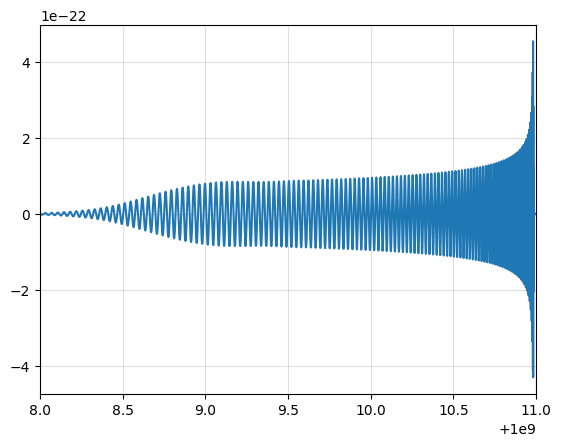

In [15]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform

# Time, orientation and location of the source in the sky
ra = 1.7
dec = 1.7
pol = 0.2
inc = 0
time = 1000000000

# We can calcualate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

# We get back the fp and fc antenna pattern weights.
fp, fc = d.antenna_pattern(ra, dec, pol, time)
print("fp={}, fc={}".format(fp, fc))




##  waveform
hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
ht = fp * hp + fc * hc    # this is what actual signal looks like that comes in the data based on its sensitivity 



hp.start_time = hc.start_time = time
ht2 = d.project_wave(hp, hc, ra, dec, pol)

plt.plot(ht2.sample_times , ht2)

plt.grid(alpha = 0.4)
plt.xlim([8+1e9 , 11+1e9]);

## Getting detectors inherint psd

['AdVBNSOptimizedSensitivityP1200087', 'AdVDesignSensitivityP1200087', 'AdVEarlyHighSensitivityP1200087', 'AdVEarlyLowSensitivityP1200087', 'AdVLateHighSensitivityP1200087', 'AdVLateLowSensitivityP1200087', 'AdVMidHighSensitivityP1200087', 'AdVMidLowSensitivityP1200087', 'AdVO3LowT1800545', 'AdVO4IntermediateT1800545', 'AdVO4T1800545', 'AdvVirgo', 'CosmicExplorerP1600143', 'CosmicExplorerPessimisticP1600143', 'CosmicExplorerWidebandP1600143', 'EinsteinTelescopeP1600143', 'GEO', 'GEOHF', 'KAGRA', 'KAGRA128MpcT1800545', 'KAGRA25MpcT1800545', 'KAGRA80MpcT1800545', 'KAGRADesignSensitivityT1600593', 'KAGRAEarlySensitivityT1600593', 'KAGRALateSensitivityT1600593', 'KAGRAMidSensitivityT1600593', 'KAGRAOpeningSensitivityT1600593', 'TAMA', 'Virgo', 'aLIGO140MpcT1800545', 'aLIGO175MpcT1800545', 'aLIGOAPlusDesignSensitivityT1800042', 'aLIGOAdVO3LowT1800545', 'aLIGOAdVO4IntermediateT1800545', 'aLIGOAdVO4T1800545', 'aLIGOBHBH20Deg', 'aLIGOBHBH20DegGWINC', 'aLIGOBNSOptimizedSensitivityP1200087', 'aL

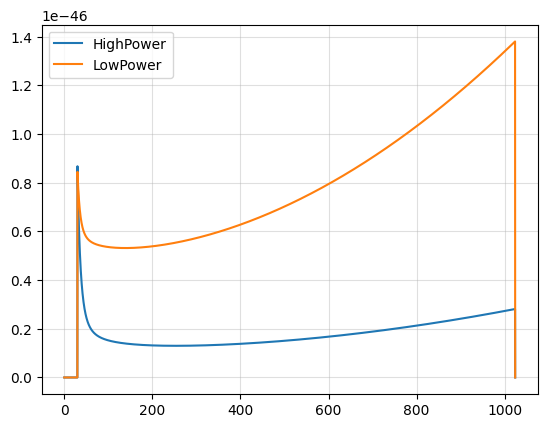

In [50]:
import matplotlib.pyplot as pp
import pycbc.psd


#available analytic psds
print(pycbc.psd.get_lalsim_psd_list())

delta_f = 1.0 / 4
flen = int(1024 / delta_f)     # upto 1024 Hz
low_frequency_cutoff = 30.0

# psd generator by name
p1 = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, low_frequency_cutoff)

# or by using the name as a string.
p2 = pycbc.psd.from_string('aLIGOZeroDetLowPower', flen, delta_f, low_frequency_cutoff)

plt.plot(p1.sample_frequencies, p1, label='HighPower')
plt.plot(p2.sample_frequencies, p2, label='LowPower')
plt.legend()
plt.grid(alpha = 0.4)
plt.show()


## Generating a noise from psd and checking the calculated vs original

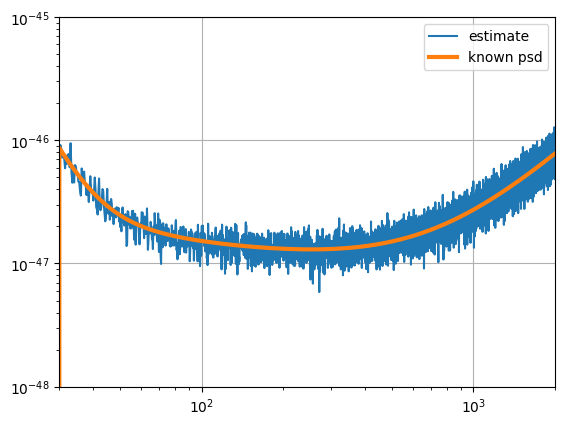

In [16]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd


# generate some colored gaussian noise
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

delta_t = 1.0 / 4096
tsamples = int(128 / delta_t)          #128 seconds of noise at 4096 Hz

ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

# 4 seconds PSD samples that are overlapped 50 %
seg_len = int(4 / delta_t)
seg_stride = int(seg_len / 2)
estimated_psd = pycbc.psd.welch(ts,
                      seg_len=seg_len,
                      seg_stride=seg_stride)

plt.loglog(estimated_psd.sample_frequencies, estimated_psd, label='estimate')
plt.loglog(psd.sample_frequencies, psd, linewidth=3, label='known psd')
plt.xlim(xmin=flow, xmax=2000)
plt.ylim(1e-48, 1e-45)
plt.legend()
plt.grid()
plt.show()

## From detector psd we can generate noise which is coloured

Text(0.5, 0, 'Time (s)')

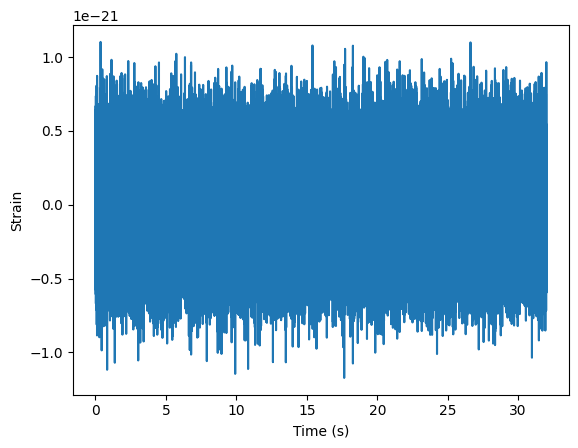

In [52]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd


# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 32 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(32 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)

plt.plot(ts.sample_times, ts)
plt.ylabel('Strain')
plt.xlabel('Time (s)')

## Getting different approximants

In [55]:


from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print('TD approximants\n\n',td_approximants())
print("\n\n\n")
# List of fd approximants that are currently available
print('FD approximants\n\n',fd_approximants())

# Note that these functions only print what is available for your current
# processing context. If a waveform is implemented in CUDA or OpenCL, it will
# only be listed when running under a CUDA or OpenCL Scheme.



TD approximants

 ['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TEOBResumS', 'IMRPhenomT', 'IMRPhenomTHM', 'IMRPhenomTP', 'IMRPhenomTPHM', 'SEOBNRv4HM_PA', 'pSEOBNRv4HM_PA', 'IMRPhenomXAS_NRTidalv2', 'IMRPhenomXP_NRTidalv2', '

In [56]:
# lets generate some waveforms

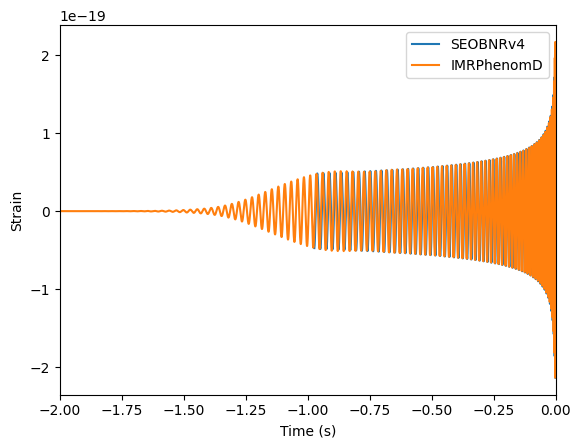

In [58]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform


for apx in ['SEOBNRv4', 'IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.xlim([-2,0])
plt.legend()
plt.show()

## Seeing how based on detector location the signal pattern changes in each detector

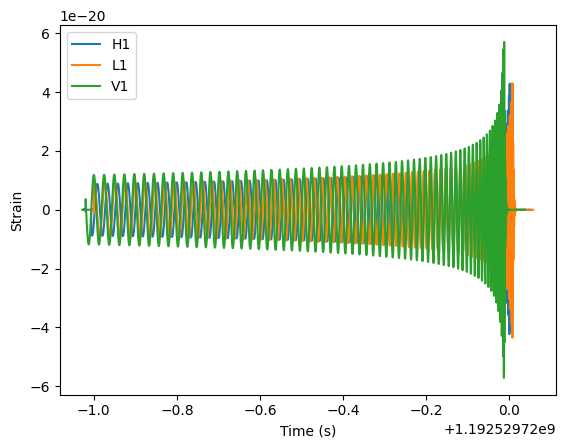

H1 time -->  1192529720.050293
L1 time -->  1192529720.057129
V1 time -->  1192529720.0371094


In [63]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector


apx = 'SEOBNRv4'
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/4096,
                         f_lower=40)

det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')


#         Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 
end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)

plt.plot(signal_h1.sample_times, signal_h1, label='H1')
plt.plot(signal_l1.sample_times, signal_l1, label='L1')
plt.plot(signal_v1.sample_times, signal_v1, label='V1')

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()
# merger time gap is due to time gap between the gw passing thorugh detectors

print("H1 time --> " , signal_h1.sample_times[-1])
print("L1 time --> " , signal_l1.sample_times[-1])
print("V1 time --> " , signal_v1.sample_times[-1])

### How same are two approximant waveform

In [63]:
from pycbc.waveform import get_td_waveform
from pycbc.filter import match
from pycbc.psd import aLIGOZeroDetHighPower

f_low = 30
sample_rate = 4096

# Generate the two waveforms to compare
hp, hc = get_td_waveform(approximant="EOBNRv2",
                         mass1=10,
                         mass2=10,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)

sp, sc = get_td_waveform(approximant="TaylorT4",
                         mass1=10,
                         mass2=10,
                         f_lower=f_low,
                         delta_t=1.0/sample_rate)

# Resize the waveforms to the same length
tlen = max(len(sp), len(hp))
sp.resize(tlen)
hp.resize(tlen)

# generating a psd for weightage while matching
delta_f = 1.0 / sp.duration
flen = tlen//2 + 1
psd = aLIGOZeroDetHighPower(flen, delta_f, f_low)


m, i = match(hp, sp, psd=psd, low_frequency_cutoff=f_low)
print('The match is: {:.4f}'.format(m) )


The match is: 0.9534


## Converting freq series ot time series and Gibbs pHenomenon

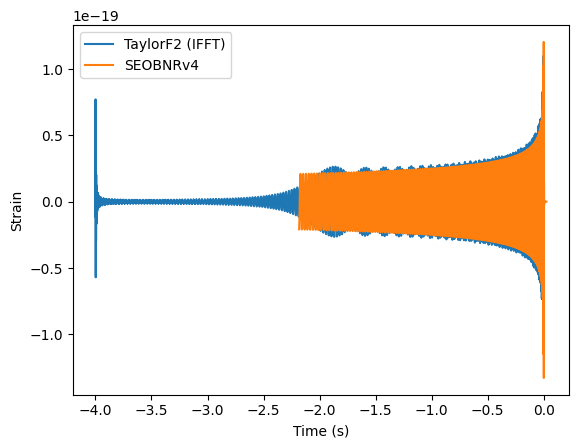

In [64]:

import matplotlib.pyplot as pp
from pycbc import types, fft, waveform


# Get a time domain waveform
hp, hc = waveform.get_td_waveform(approximant='SEOBNRv4',
                             mass1=6, mass2=6, delta_t=1.0/4096, f_lower=40)

# Get a frequency domain waveform
sptilde, sctilde = waveform. get_fd_waveform(approximant="TaylorF2",
                             mass1=6, mass2=6, delta_f=1.0/4, f_lower=40)

# FFT it to the time-domain
tlen = int(1.0 / hp.delta_t / sptilde.delta_f)
sptilde.resize(tlen/2 + 1)
sp = types.TimeSeries(types.zeros(tlen), delta_t=hp.delta_t)
fft.ifft(sptilde, sp)

plt.plot(sp.sample_times, sp, label="TaylorF2 (IFFT)")
plt.plot(hp.sample_times, hp, label='SEOBNRv4')

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

## Phase and amplitude 

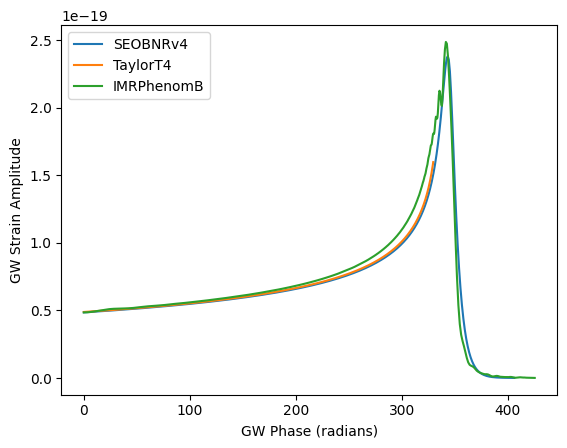

In [6]:
import matplotlib.pyplot as pp
from pycbc import waveform


for apx in ['SEOBNRv4', 'TaylorT4', 'IMRPhenomB']:
    hp, hc = waveform.get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 delta_t=1.0/4096,
                                 f_lower=40)
   
    hp, hc = hp.trim_zeros(), hc.trim_zeros()     # otherwise a problem while taking tan inverse for phase
    amp = waveform.utils.amplitude_from_polarizations(hp, hc)    # norm of that vector
    phase = waveform.utils.phase_from_polarizations(hp, hc)   # tan angle

    plt.plot(phase, amp, label=apx)

plt.ylabel('GW Strain Amplitude')
plt.xlabel('GW Phase (radians)')
plt.legend(loc='upper left')
plt.show()

##  Freq varaition based on number of terms in approximation'

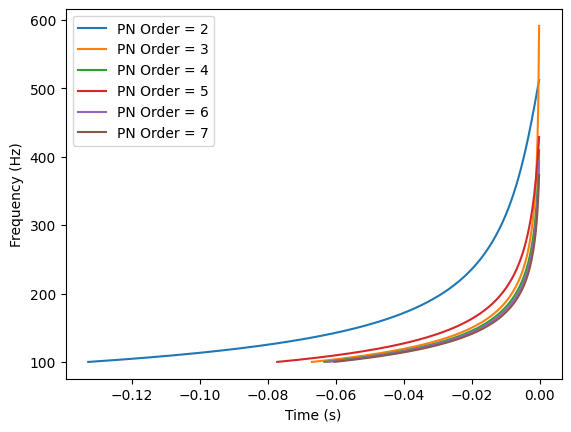

In [65]:
for phase_order in [2, 3, 4, 5, 6, 7]:     # no of terms in approximation 
    hp, hc = waveform.get_td_waveform(approximant='SpinTaylorT4',
                                 mass1=10, mass2=10,
                                 phase_order=phase_order,
                                 delta_t=1.0/4096,
                                 f_lower=100)

    #hp, hc = hp.trim_zeros(), hc.trim_zeros()
    f = waveform.utils.frequency_from_polarizations(hp, hc)

    plt.plot(f.sample_times, f, label="PN Order = %s" % phase_order)

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

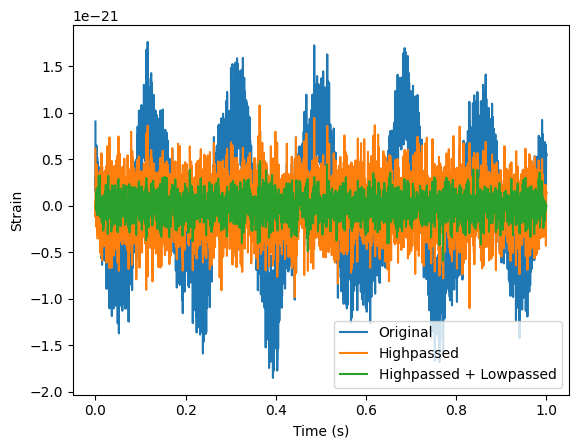

In [75]:

flow = 5.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 1 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(1 / delta_t)
ts = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
plt.plot(ts.sample_times, ts, label='Original')

# Suppress the low frequencies below 30 Hz
ts = pycbc.filter.highpass(ts, 30.0)
plt.plot(ts.sample_times, ts, label='Highpassed')

# Suppress the high frequencies
ts = pycbc.filter.lowpass_fir(ts, 1000.0, 8)
plt.plot(ts.sample_times, ts, label='Highpassed + Lowpassed')

plt.legend()
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.show()



## Pure noise snr 

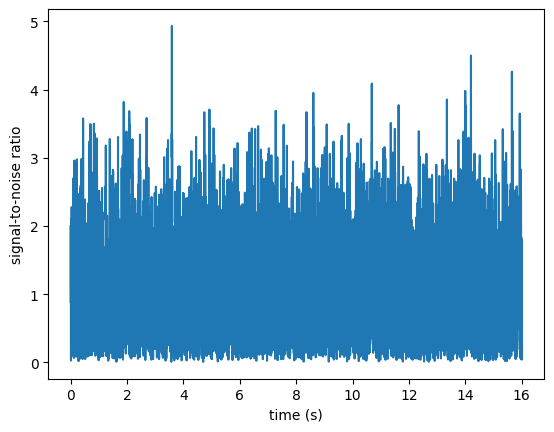

In [12]:
import pycbc.noise , pycbc.psd

flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 16 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(16 / delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
s_tilde = strain.to_frequencyseries()

# Use a waveform as a matched filter
hp, hc = pycbc.waveform.get_fd_waveform(approximant='IMRPhenomD',
                             mass1=25, mass2=25,
                             f_lower=flow, delta_f=s_tilde.delta_f)

hp.resize(len(s_tilde))
snr = pycbc.filter.matched_filter(hp, s_tilde, psd=psd,
                                      low_frequency_cutoff=flow)


plt.plot(snr.sample_times, abs(snr))
plt.ylabel('signal-to-noise ratio')
plt.xlabel('time (s)')
plt.show()


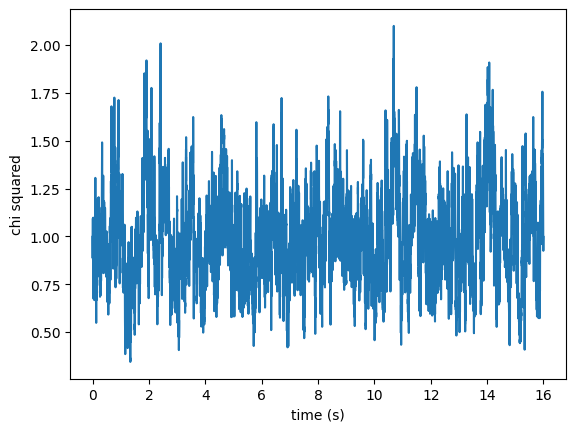

In [80]:
import matplotlib.pyplot as pp
import pycbc.noise
import pycbc.psd
import pycbc.waveform
import pycbc.vetoes


flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 16 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096
tsamples = int(16 / delta_t)
strain = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=127)
stilde = strain.to_frequencyseries()

# Calculate the power chisq time series
hp, hc = pycbc.waveform.get_fd_waveform(approximant='IMRPhenomD',
                             mass1=25, mass2=25,
                             f_lower=flow, delta_f=stilde.delta_f)

hp.resize(len(stilde))
num_bins = 16
chisq = pycbc.vetoes.power_chisq(hp, stilde, num_bins, psd,
                                      low_frequency_cutoff=flow)

# convert to a reduced chisq
chisq /= (num_bins * 2) - 2

plt.plot(chisq.sample_times, chisq)
plt.ylabel("chi squared")
plt.xlabel('time (s)')
plt.show()

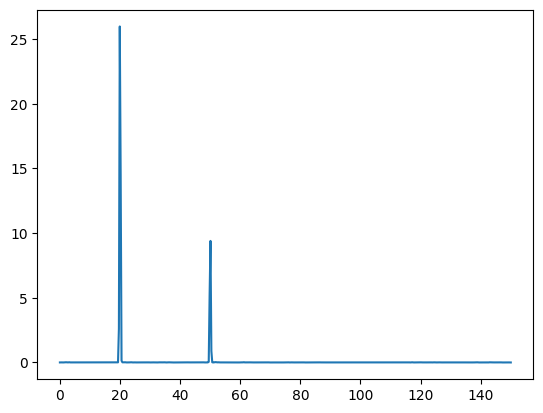

In [22]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from scipy.signal import welch

pi=np.pi
sps=300.0 # sampling frequency
dt=1/sps
f1=20.0
f2=50.0



Tobs=10.0
N=int(Tobs*sps)
x=np.linspace(0, Tobs, N)
y=5*np.sin(2*pi*f1*x)+3*np.sin(2*pi*f2*x)
noise = y + np.random.randn(N)

fs , psd  = welch(noise , sps , nperseg = 1024)
plt.plot(fs , psd)

# Using match function to see which masses best suit


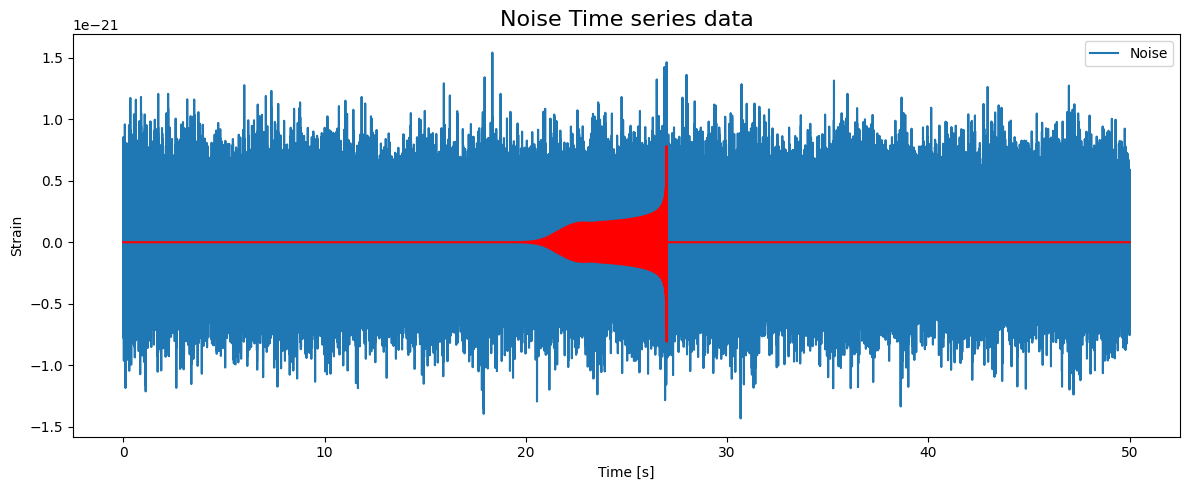


Search complete!


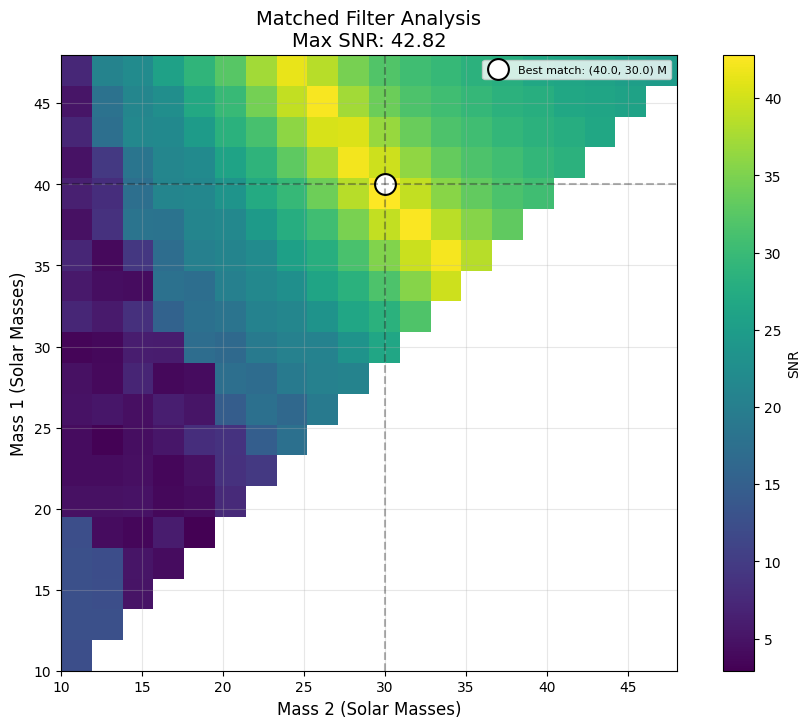


Best matching masses: M1=40.00 M, M2=30.00 M
Maximum SNR: 42.820


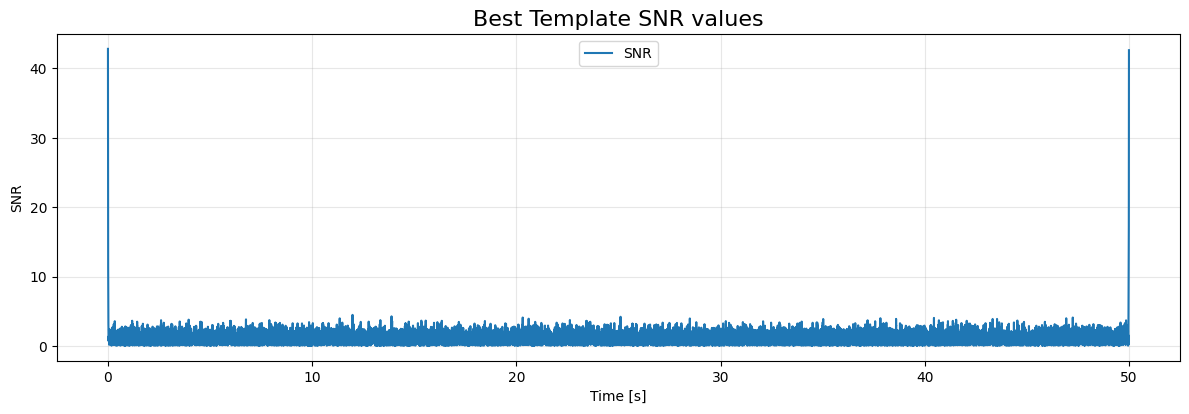

Time to run the code :53.880 seconds


In [2]:
##########################################################
####### LIBRARIES 
##########################################################
from pycbc import noise, psd
from pycbc.psd import aLIGOZeroDetHighPower
from pycbc.waveform import get_td_waveform
from pycbc.filter import matched_filter
import matplotlib.pyplot as plt
import numpy as np
import time

start = time.time()
##########################################################
# Creating a data series with imbedded known signal for analysis
##########################################################

# first lets pretend we have a signal in our data and lets make it like a time series data

# Parameters  (need to be consistent throught out the program)

T = 50.0
sps = 4096   
f_low = 10.0    # detector band 

dt = 1/sps      # time spacing
df = 1.0 / T  # freq spacing
N = int(sps*T)     # total points  in time
f_N = int(N/2) +1  # total points in freq

########################## noise creation ##############################

psd = aLIGOZeroDetHighPower(f_N, df, f_low)   # we generated a psd to mimic detector noise
noise = noise.noise_from_psd(N, dt, psd,seed = 130)   # so we get a noise  



################### the waveform we have:###############################

hp, hc = get_td_waveform(approximant="IMRPhenomD",mass1=30,mass2=40,delta_t=dt,f_lower=f_low,
                         distance = 1000)  # distance is used to reduce here the siganl strength

#print(hp.duration)  # 32
hp.resize(N); hc.resize(N)

hp.start_time=noise.start_time
noise_data=noise+hp



#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.figure(figsize = (12,5))
plt.plot(noise_data.sample_times , noise_data)
plt.plot(hp.sample_times, hp, 'r')
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.legend(["Noise"])
plt.title("Noise Time series data",size = 16)
plt.tight_layout()
plt.savefig("noise_data.png",dpi = 750)
plt.show()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%





###############################################################
#
#                   ANALYSIS STARTS HERE
### lets see if there is signal in this noise with match filter for various templates with diff masses
###############################################################


m1_vals = np.arange(10, 50, 2) 
m2_vals = np.arange(10, 50, 2)   

snr_grid = np.zeros((len(m1_vals), len(m2_vals)))   # we are creating a 2d matrxi

##############################   INITIALIZATION   ####################################
global_snr_max = 0
best_mass = (0, 0) 

for i,m1 in enumerate(m1_vals):
    for j,m2 in enumerate(m2_vals):
        if m1 >= m2:
            
            hp_tem , hc_tem = get_td_waveform(approximant = "IMRPhenomD" , mass1 = m1 , mass2 = m2,
                                                f_lower = f_low , delta_t = dt)
            
            hp_tem.resize(len(noise_data))     # resizing to equal lengths
            snr = matched_filter(hp_tem, noise_data, psd=psd, low_frequency_cutoff=f_low)
            
            max_snr = abs(snr).max()
            snr_grid[i, j] = max_snr
            
            if max_snr > global_snr_max:
                global_snr_max = max_snr
                best_mass = (m1, m2)
                
        else:
            snr_grid[i,j] = None      # ignoring other symmetric part

print(f"\nSearch complete!")





######################################
######          Plotting
####################################
plt.figure(figsize=(12, 8))

plt.imshow(snr_grid, 
           extent=[m1_vals[0], m1_vals[-1], 
                   m2_vals[0], m2_vals[-1]], origin='lower')

# Marking best match 
plt.plot(best_mass[1], best_mass[0], 'wo', markersize=15,markeredgecolor='black', markeredgewidth=1.5, 
         label=f'Best match: ({best_mass[0]:.1f}, {best_mass[1]:.1f}) M')

plt.colorbar(label='SNR')
plt.xlabel('Mass 2 (Solar Masses)', fontsize=12)
plt.ylabel('Mass 1 (Solar Masses)', fontsize=12)
plt.title(f'Matched Filter Analysis\nMax SNR: {global_snr_max:.2f}', fontsize=14)
plt.legend(fontsize=8)
plt.axvline(best_mass[1],linestyle = "--",alpha = 0.3,color = 'black')
plt.axhline(best_mass[0],linestyle = "--",alpha = 0.3,color = 'black')
plt.grid(alpha=0.3)
plt.savefig("snr_analysis.png",dpi = 750)
plt.show()
print(f"\nBest matching masses: M1={best_mass[0]:.2f} M, M2={best_mass[1]:.2f} M")
print(f"Maximum SNR: {global_snr_max:.3f}")



############################### BEST TEMPLATE SNR #################################
hp_tem_best, hc_tem_best = get_td_waveform(approximant = "IMRPhenomD" , mass1 = best_mass[0] , mass2 = best_mass[1],
                                                f_lower = f_low , delta_t = dt)
hp_tem_best.resize(len(noise_data))
snr = matched_filter(hp_tem_best, noise_data, psd=psd, low_frequency_cutoff=f_low)
plt.figure(figsize = (12,4))
plt.plot(snr.sample_times , abs(snr))
plt.legend(["SNR"])
plt.grid(alpha = 0.3)
plt.xlabel("Time [s]")
plt.ylabel("SNR")
plt.tight_layout()
plt.title("Best Template SNR values",size = 16)
plt.show()



end = time.time()

print(f'Time to run the code :{end-start:3.3f} seconds')

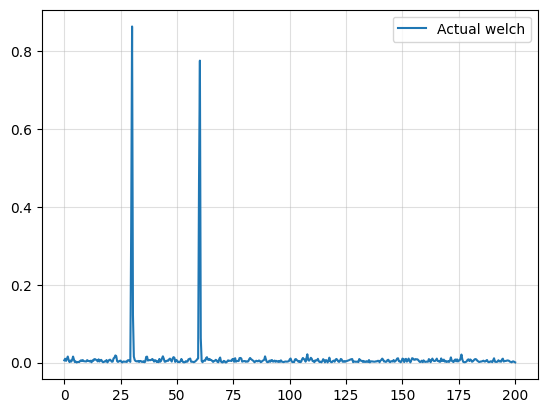

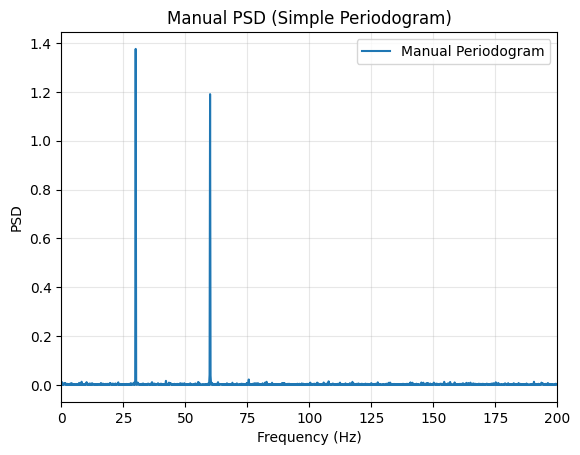

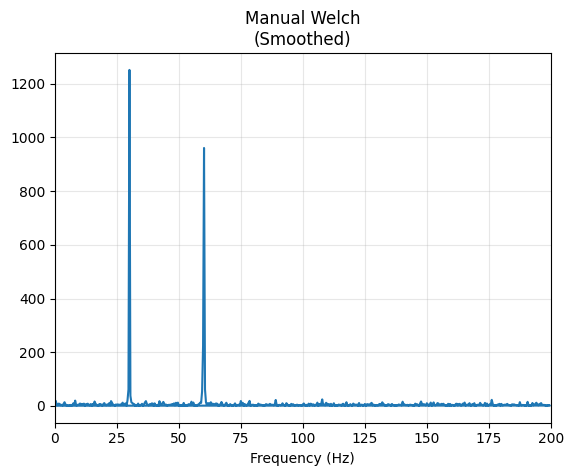

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch 
import scipy.fft as fft


sps = 400
T_obs = 5

dt = 1/sps
N = sps*T_obs

ts = np.linspace(0,T_obs , N)

f1,f2 = 30,60
y = np.sin(2*np.pi*f1*ts) + np.sin(2*np.pi*f2*ts)
noise = np.random.randn(N)

data = y + noise

##########################
###        WELCH 
####################3

f , psd_welch = welch(data,sps , nperseg = 1024)
 
plt.plot(f,psd_welch)
plt.grid(alpha = 0.4)
plt.legend(["Actual welch"])
plt.show()


##########################
###       Pediogram on whole
####################3

f_data = fft.fft(data)


psd_manual = (1.0 / (sps * N)) * np.abs(f_data)**2   # on whole dataset


psd_manual = psd_manual[:N//2 + 1]
#psd_manual[1:-1] *= 2  # Double power for positive frequencies except for constant

# Frequency array
freqs_manual = np.fft.fftfreq(N, dt)[:N//2 + 1]


plt.plot(freqs_manual, psd_manual, label='Manual Periodogram')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Manual PSD (Simple Periodogram)')
plt.xlim([0, 200])
plt.grid(alpha=0.3)

plt.legend()
plt.show()


##########################
###      Manual   WELCH 
####################3
nperseg = 1024
N = len(data)

step = nperseg -nperseg // 2
n_seg = (N - nperseg // 2) // step

psd = np.zeros(nperseg//2 + 1)

for i in range(n_seg):
    start = i * step
    if start + nperseg > N:
        break

    segment = data[start:start+nperseg] #* window
    fft_seg = fft.fft(segment)
    psd_seg = (1/(sps)) * np.abs(fft_seg[:nperseg//2+1])**2
    psd_seg[1:-1] *= 2
    psd += psd_seg

psd /= n_seg
freqs = np.fft.fftfreq(nperseg, 1/sps)[:nperseg//2+1]


freqs_manual, psd_manual = freqs , psd



plt.plot(freqs_manual, psd_manual)
plt.title('Manual Welch\n(Smoothed)')
plt.xlim([0, 200])
plt.xlabel('Frequency (Hz)')
plt.grid(alpha=0.3)

plt.show()
